# Evaluate HammerDB Result

<img src="https://raw.githubusercontent.com/Beuth-Erdelt/Benchmark-Experiment-Host-Manager/master/docs/workflow-sketch-simple.png"/>


About the benchmark [1]:
> The TPC-C specification on which TPROC-C is based implements a computer system to fulfil orders from customers to supply products from a company. The company sells 100,000 items and keeps its stock in warehouses. Each warehouse has 10 sales districts and each district serves 3000 customers. The customers call the company whose operators take the order, each order containing a number of items. Orders are usually satisfied from the local warehouse however a small number of items are not in stock at a particular point in time and are supplied by an alternative warehouse. It is important to note that the size of the company is not fixed and can add Warehouses and sales districts as the company grows. For this reason your test schema can be as small or large as you wish with a larger schema requiring a more powerful computer system to process the increased level of transactions. The TPROC-C schema is shown below, in particular note how the number of rows in all of the tables apart from the ITEM table which is fixed is dependent upon the number of warehouses you choose to create your schema.

<img src="https://www.hammerdb.com/docs/resources/ch3-2.png" alt="drawing" width="600"/>

About the metrics [2]:
> HammerDB workloads produce 2 statistics to compare systems called **TPM** and NOPM respectively. NOPM value is based on a metric captured from within the test schema itself. As such **NOPM (New Orders per minute)** as a performance metric independent of any particular database implementation is the recommended primary metric to use.

References
1. https://www.hammerdb.com/docs/ch03s05.html
1. https://www.hammerdb.com/docs/ch03s04.html
1. https://www.hammerdb.com/docs/ch03.html

## Import Packages

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import pickle
# Some nice output
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
from IPython.display import display, Markdown
%matplotlib inline

import evaluator

## Prepare Result

### Pick Result

In [2]:
code = "1686560626"
path = "./"

### Start Evaluation

In [3]:
evaluation = evaluator.tpcc(code=code, path=path)

### Transform all Benchmarking Log Files to DataFrames

We also pick the first log file to be an example for later

In [4]:
filename_example = ""

directory = os.fsencode(path+"/"+code)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.startswith("bexhoma-benchmarker") and filename.endswith(".log"):
        #print("filename:", filename)
        pod_name = filename[filename.rindex("-")+1:-len(".log")]
        #print("pod_name:", pod_name)
        jobname = filename[len("bexhoma-benchmarker-"):-len("-"+pod_name+".log")]
        print("jobname:", jobname)
        evaluation.end_benchmarking(jobname)
        filename_example = filename

jobname: postgresql-aws-8-1-1686560626-1-1
jobname: postgresql-aws-8-1-1686560626-1-2
jobname: postgresql-aws-8-1-1686560626-1-3
jobname: postgresql-aws-8-1-1686560626-1-4
jobname: postgresql-aws-8-1-1686560626-1-5
jobname: postgresql-aws-8-1-1686560626-1-6
jobname: postgresql-aws-8-1-1686560626-1-7
jobname: postgresql-aws-8-1-1686560626-1-8
jobname: postgresql-aws-8-2-1686560626-1-1
jobname: postgresql-aws-8-2-1686560626-1-1
jobname: postgresql-aws-8-2-1686560626-1-2
jobname: postgresql-aws-8-2-1686560626-1-2
jobname: postgresql-aws-8-2-1686560626-1-3
jobname: postgresql-aws-8-2-1686560626-1-3
jobname: postgresql-aws-8-2-1686560626-1-4
jobname: postgresql-aws-8-2-1686560626-1-4
jobname: postgresql-aws-8-2-1686560626-1-5
jobname: postgresql-aws-8-2-1686560626-1-5
jobname: postgresql-aws-8-2-1686560626-1-6
jobname: postgresql-aws-8-2-1686560626-1-6
jobname: postgresql-aws-8-2-1686560626-1-7
jobname: postgresql-aws-8-2-1686560626-1-7
jobname: postgresql-aws-8-2-1686560626-1-8
jobname: po

### Show a DataFrame for single Pod as Example

In [5]:
filename = path+"/"+code+"/"+filename_example+".df.pickle"
print(filename)
df = pd.read_pickle(filename)
df

.//1686560626/bexhoma-benchmarker-postgresql-aws-8-2-1686560626-1-8-mz9qh.log.df.pickle


connection       configuration experiment_run  \
PostgreSQL-AWS-8-2-8                                                            
0                     PostgreSQL-AWS-8-2-8  PostgreSQL-AWS-8-2              1   

                     client    pod pod_count iterations duration rampup   sf  \
PostgreSQL-AWS-8-2-8                                                           
0                         8  mz9qh         2   10000000       15      5  320   

                      run  errors vusers_loading vusers  NOPM   TPM  \
PostgreSQL-AWS-8-2-8                                                  
0                       0       0              8     10  2642  6855   

                            dbms  
PostgreSQL-AWS-8-2-8              
0                     PostgreSQL

In [6]:
warehouses = int(df['sf'].max())

### Transform all DataFrames into single Result DataFrame

In [7]:
evaluation.evaluate_results()

## Get Benchmarking Result

In [8]:
df = evaluation.get_df_benchmarking()

df

connection       configuration  \
connection_pod                                                     
PostgreSQL-AWS-8-1-1-1  PostgreSQL-AWS-8-1-1  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-1-2-1  PostgreSQL-AWS-8-1-2  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-1-3-1  PostgreSQL-AWS-8-1-3  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-1-4-1  PostgreSQL-AWS-8-1-4  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-1-5-1  PostgreSQL-AWS-8-1-5  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-1-6-1  PostgreSQL-AWS-8-1-6  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-1-7-1  PostgreSQL-AWS-8-1-7  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-1-8-1  PostgreSQL-AWS-8-1-8  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-2-1-1  PostgreSQL-AWS-8-2-1  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-1-2  PostgreSQL-AWS-8-2-1  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-2-1  PostgreSQL-AWS-8-2-2  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-2-2  PostgreSQL-AWS-8-2-2  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-3-1  PostgreSQL-AWS-8-2-3  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-3-2  PostgreSQL-AWS-8-2-3  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-4-1  PostgreSQL-AWS-8-2-4  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-4-2  PostgreSQL-AWS-8-2-4  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-5-1  PostgreSQL-AWS-8-2-5  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-5-2  PostgreSQL-AWS-8-2-5  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-6-1  PostgreSQL-AWS-8-2-6  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-6-2  PostgreSQL-AWS-8-2-6  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-7-1  PostgreSQL-AWS-8-2-7  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-7-2  PostgreSQL-AWS-8-2-7  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-8-1  PostgreSQL-AWS-8-2-8  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-8-2  PostgreSQL-AWS-8-2-8  PostgreSQL-AWS-8-2   

                       experiment_run client    pod pod_count iterations  \
connection_pod                                                             
PostgreSQL-AWS-8-1-1-1              1      1  6w87d         1   10000000   
PostgreSQL-AWS-8-1-2-1              1      2  2k9pt         1   10000000   
PostgreSQL-AWS-8-1-3-1              1      3  gzbdt         1   10000000   
PostgreSQL-AWS-8-1-4-1              1      4  5zcml         1   10000000   
PostgreSQL-AWS-8-1-5-1              1      5  gzgm5         1   10000000   
PostgreSQL-AWS-8-1-6-1              1      6  5rvj6         1   10000000   
PostgreSQL-AWS-8-1-7-1              1      7  kmrcb         1   10000000   
PostgreSQL-AWS-8-1-8-1              1      8  bfgtc         1   10000000   
PostgreSQL-AWS-8-2-1-1              1      1  nkn9f         2   10000000   
PostgreSQL-AWS-8-2-1-2              1      1  rknx9         2   10000000   
PostgreSQL-AWS-8-2-2-1              1      2  77qgr         2   10000000   
PostgreSQL-AWS-8-2-2-2              1      2  jd87d         2   10000000   
PostgreSQL-AWS-8-2-3-1              1      3  4ltg9         2   10000000   
PostgreSQL-AWS-8-2-3-2              1      3  zzf6f         2   10000000   
PostgreSQL-AWS-8-2-4-1              1      4  kxtcr         2   10000000   
PostgreSQL-AWS-8-2-4-2              1      4  lxjjm         2   10000000   
PostgreSQL-AWS-8-2-5-1              1      5  696vx         2   10000000   
PostgreSQL-AWS-8-2-5-2              1      5  hz2gq         2   10000000   
PostgreSQL-AWS-8-2-6-1              1      6  qp4kc         2   10000000   
PostgreSQL-AWS-8-2-6-2              1      6  s9246         2   10000000   
PostgreSQL-AWS-8-2-7-1              1      7  6l7ht         2   10000000   
PostgreSQL-AWS-8-2-7-2              1      7  rp6q6         2   10000000   
PostgreSQL-AWS-8-2-8-1              1      8  gv77k         2   10000000   
PostgreSQL-AWS-8-2-8-2              1      8  mz9qh         2   10000000   

                       duration rampup   sf  run  errors vusers_loading  \
connection_pod                                                            
PostgreSQL-AWS-8-1-1-1       15      5  320    0       0              8   
PostgreSQL-AWS-8-1-2-1       15      5  320    0       0       

### Reconstruct workflow out of result

In [9]:
evaluation.reconstruct_workflow(df)

{'PostgreSQL-AWS-8-1': [[1, 1, 1, 1, 1, 1, 1, 1]],
 'PostgreSQL-AWS-8-2': [[2, 2, 2, 2, 2, 2, 2, 2]]}

### Plot Results

#### Set data types for plotting

In [10]:
df_plot = evaluation.benchmarking_set_datatypes(df)

df_plot.T

connection_pod PostgreSQL-AWS-8-1-1-1 PostgreSQL-AWS-8-1-2-1  \
connection       PostgreSQL-AWS-8-1-1   PostgreSQL-AWS-8-1-2   
configuration      PostgreSQL-AWS-8-1     PostgreSQL-AWS-8-1   
experiment_run                      1                      1   
client                              1                      2   
pod                             6w87d                  2k9pt   
pod_count                           1                      1   
iterations                   10000000               10000000   
duration                           15                     15   
rampup                              5                      5   
sf                                320                    320   
run                                 0                      0   
errors                              0                      0   
vusers_loading                      8                      8   
vusers                              2                      4   
NOPM                            11197                  22342   
TPM                             25797                  51539   
dbms                       PostgreSQL             PostgreSQL   

connection_pod PostgreSQL-AWS-8-1-3-1 PostgreSQL-AWS-8-1-4-1  \
connection       PostgreSQL-AWS-8-1-3   PostgreSQL-AWS-8-1-4   
configuration      PostgreSQL-AWS-8-1     PostgreSQL-AWS-8-1   
experiment_run                      1                      1   
client                              3                      4   
pod                             gzbdt                  5zcml   
pod_count                           1                      1   
iterations                   10000000               10000000   
duration                           15                     15   
rampup                              5                      5   
sf                                320                    320   
run                                 0                      0   
errors                              0                      0   
vusers_loading                      8                      8   
vusers                              6                      8   
NOPM                            31908                  36171   
TPM                             73321                  83275   
dbms                       PostgreSQL             PostgreSQL   

connection_pod PostgreSQL-AWS-8-1-5-1 PostgreSQL-AWS-8-1-6-1  \
connection       PostgreSQL-AWS-8-1-5   PostgreSQL-AWS-8-1-6   
configuration      PostgreSQL-AWS-8-1     PostgreSQL-AWS-8-1   
experiment_run                      1                      1   
client                              5                      6   
pod                             gzgm5                  5rvj6   
pod_count                           1                      1   
iterations                   10000000               10000000   
duration                           15                     15   
rampup                              5                      5   
sf                                320                    320   
run                                 0                      0   
errors                              0                      0   
vusers_loading                      8                      8   
vusers                             10                     12   
NOPM                            42640                   2216   
TPM                             98164                   5672   
dbms                       PostgreSQL             PostgreSQL   

connection_pod PostgreSQL-AWS-8-1-7-1 PostgreSQL-AWS-8-1-8-1  \
connection       PostgreSQL-AWS-8-1-7   PostgreSQL-AWS-8-1-8   
configuration      PostgreSQL-AWS-8-1     PostgreSQL-AWS-8-1   
experiment_run                      1                      1   
client                              7                      8   
pod                             kmrcb                  bfgtc   
pod_count                           1                      1   
iterations                   10000000               10000000   
duration                     

#### Restrict result to specific part

In [11]:
df[df['configuration']=='MariaDB-4']

Empty DataFrame
Columns: [connection, configuration, experiment_run, client, pod, pod_count, iterations, duration, rampup, sf, run, errors, vusers_loading, vusers, NOPM, TPM, dbms]
Index: []

In [12]:
#df_plot = df_plot[df_plot["experiment_run"]=="1"]
#df_plot = df_plot[df_plot["client"] == "1"]
df_plot.sort_values(["client", "vusers"], inplace=True)
df_plot

connection       configuration  \
connection_pod                                                     
PostgreSQL-AWS-8-2-1-1  PostgreSQL-AWS-8-2-1  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-1-2  PostgreSQL-AWS-8-2-1  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-1-1-1  PostgreSQL-AWS-8-1-1  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-2-2-1  PostgreSQL-AWS-8-2-2  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-2-2  PostgreSQL-AWS-8-2-2  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-1-2-1  PostgreSQL-AWS-8-1-2  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-2-3-1  PostgreSQL-AWS-8-2-3  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-3-2  PostgreSQL-AWS-8-2-3  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-1-3-1  PostgreSQL-AWS-8-1-3  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-2-4-1  PostgreSQL-AWS-8-2-4  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-4-2  PostgreSQL-AWS-8-2-4  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-1-4-1  PostgreSQL-AWS-8-1-4  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-2-5-1  PostgreSQL-AWS-8-2-5  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-5-2  PostgreSQL-AWS-8-2-5  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-1-5-1  PostgreSQL-AWS-8-1-5  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-2-6-1  PostgreSQL-AWS-8-2-6  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-6-2  PostgreSQL-AWS-8-2-6  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-1-6-1  PostgreSQL-AWS-8-1-6  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-2-7-1  PostgreSQL-AWS-8-2-7  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-7-2  PostgreSQL-AWS-8-2-7  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-1-7-1  PostgreSQL-AWS-8-1-7  PostgreSQL-AWS-8-1   
PostgreSQL-AWS-8-2-8-1  PostgreSQL-AWS-8-2-8  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-2-8-2  PostgreSQL-AWS-8-2-8  PostgreSQL-AWS-8-2   
PostgreSQL-AWS-8-1-8-1  PostgreSQL-AWS-8-1-8  PostgreSQL-AWS-8-1   

                        experiment_run  client    pod  pod_count  iterations  \
connection_pod                                                                 
PostgreSQL-AWS-8-2-1-1               1       1  nkn9f          2    10000000   
PostgreSQL-AWS-8-2-1-2               1       1  rknx9          2    10000000   
PostgreSQL-AWS-8-1-1-1               1       1  6w87d          1    10000000   
PostgreSQL-AWS-8-2-2-1               1       2  77qgr          2    10000000   
PostgreSQL-AWS-8-2-2-2               1       2  jd87d          2    10000000   
PostgreSQL-AWS-8-1-2-1               1       2  2k9pt          1    10000000   
PostgreSQL-AWS-8-2-3-1               1       3  4ltg9          2    10000000   
PostgreSQL-AWS-8-2-3-2               1       3  zzf6f          2    10000000   
PostgreSQL-AWS-8-1-3-1               1       3  gzbdt          1    10000000   
PostgreSQL-AWS-8-2-4-1               1       4  kxtcr          2    10000000   
PostgreSQL-AWS-8-2-4-2               1       4  lxjjm          2    10000000   
PostgreSQL-AWS-8-1-4-1               1       4  5zcml          1    10000000   
PostgreSQL-AWS-8-2-5-1               1       5  696vx          2    10000000   
PostgreSQL-AWS-8-2-5-2               1       5  hz2gq          2    10000000   
PostgreSQL-AWS-8-1-5-1               1       5  gzgm5          1    10000000   
PostgreSQL-AWS-8-2-6-1               1       6  qp4kc          2    10000000   
PostgreSQL-AWS-8-2-6-2               1       6  s9246          2    10000000   
PostgreSQL-AWS-8-1-6-1               1       6  5rvj6          1    10000000   
PostgreSQL-AWS-8-2-7-1               1       7  6l7ht          2    10000000   
PostgreSQL-AWS-8-2-7-2               1       7  rp6q6          2    10000000   
PostgreSQL-AWS-8-1-7-1               1       7  kmrcb          1    10000000   
PostgreSQL-AWS-8-2-8-1               1       8  gv77k          2    10000000   
PostgreSQL-AWS-8-2-8-2               1       8  mz9qh          2    10000000   
PostgreSQL-AWS-8-1-8-1               1       8  bfgtc          1    10000000   

                        duration  rampup   sf  run  errors  vusers_loading  \
connection_pod                                                               
PostgreSQL-AWS-8-2-1-1      

#### Plot metrics

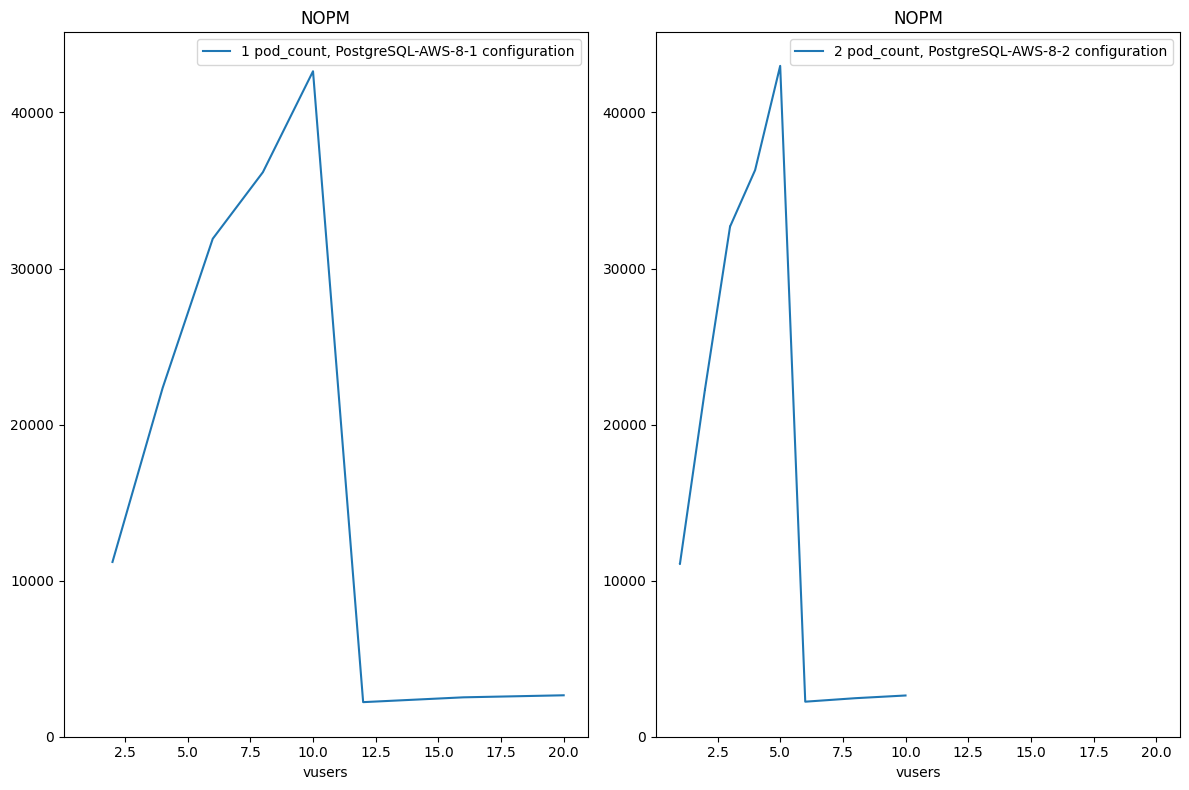

In [13]:
%matplotlib inline

x = "vusers"
y = "NOPM"
column = "configuration"
df_plot.sort_values("vusers", inplace=True)
evaluation.plot(df_plot, column=column, x=x, y=y, plot_by="pod_count")

### Aggregate by parallel pods

In [14]:
df = evaluation.get_df_benchmarking()
df_plot = evaluation.benchmarking_set_datatypes(df)
df_aggregated = evaluation.benchmarking_aggregate_by_parallel_pods(df_plot)
df_aggregated.T

PostgreSQL-AWS-8-1-1  PostgreSQL-AWS-8-1-2  \
connection      PostgreSQL-AWS-8-1-1  PostgreSQL-AWS-8-1-2   
configuration     PostgreSQL-AWS-8-1    PostgreSQL-AWS-8-1   
experiment_run                     1                     1   
client                             1                     2   
pod                            6w87d                 2k9pt   
pod_count                          1                     1   
iterations                  10000000              10000000   
duration                          15                    15   
sf                               320                   320   
run                                0                     0   
errors                             0                     0   
vusers_loading                     8                     8   
vusers                             2                     4   
NOPM                         11197.0               22342.0   
TPM                          25797.0               51539.0   
dbms                      PostgreSQL            PostgreSQL   

                PostgreSQL-AWS-8-1-3  PostgreSQL-AWS-8-1-4  \
connection      PostgreSQL-AWS-8-1-3  PostgreSQL-AWS-8-1-4   
configuration     PostgreSQL-AWS-8-1    PostgreSQL-AWS-8-1   
experiment_run                     1                     1   
client                             3                     4   
pod                            gzbdt                 5zcml   
pod_count                          1                     1   
iterations                  10000000              10000000   
duration                          15                    15   
sf                               320                   320   
run                                0                     0   
errors                             0                     0   
vusers_loading                     8                     8   
vusers                             6                     8   
NOPM                         31908.0               36171.0   
TPM                          73321.0               83275.0   
dbms                      PostgreSQL            PostgreSQL   

                PostgreSQL-AWS-8-1-5  PostgreSQL-AWS-8-1-6  \
connection      PostgreSQL-AWS-8-1-5  PostgreSQL-AWS-8-1-6   
configuration     PostgreSQL-AWS-8-1    PostgreSQL-AWS-8-1   
experiment_run                     1                     1   
client                             5                     6   
pod                            gzgm5                 5rvj6   
pod_count                          1                     1   
iterations                  10000000              10000000   
duration                          15                    15   
sf                               320                   320   
run                                0                     0   
errors                             0                     0   
vusers_loading                     8                     8   
vusers                            10                    12   
NOPM                         42640.0                2216.0   
TPM                          98164.0                5672.0   
dbms                      PostgreSQL            PostgreSQL   

                PostgreSQL-AWS-8-1-7  PostgreSQL-AWS-8-1-8  \
connection      PostgreSQL-AWS-8-1-7  PostgreSQL-AWS-8-1-8   
configuration     PostgreSQL-AWS-8-1    PostgreSQL-AWS-8-1   
experiment_run                     1                     1   
client                             7                     8   
pod                            kmrcb                 bfgtc   
pod_count                          1                     1   
iterations                  10000000              10000000   
duration                          15                    15   
sf                               320                   320   
run                                0                     0   
errors                             0                     0   
vusers_loading                     8                     8   
vusers                            16         

#### Plot

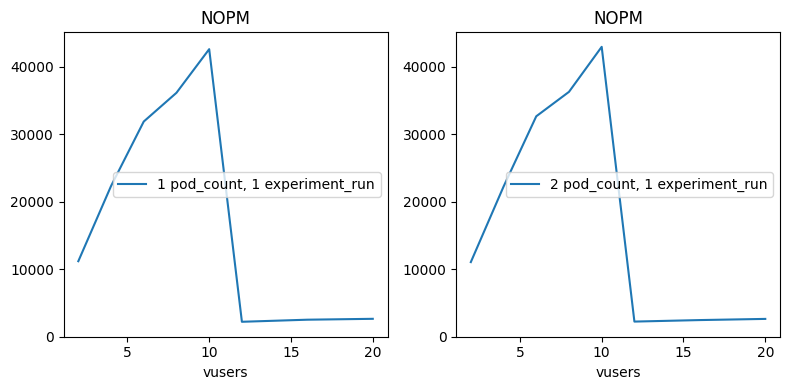

In [15]:
column = "experiment_run"
x = "vusers"
y = "NOPM"
df_plot_this = df_aggregated.sort_values("client")
df_plot_this[y] = df_plot_this[y]/1000.
ax = evaluation.plot(df_aggregated.sort_values("vusers"), x=x, y=y, figsize=(8,4), plot_by="pod_count", column=column)
#ax = df_plot_this.plot(x=x, y=y, figsize=(2,2), legend=False, title="NOPM [$1000$]", plot_by="pod_count")#, column=column)
#ax.axvline(8, color='k', linestyle='--')
#ax.title.set_size(10)


pod_count       1        2
vusers                    
2          11.197  11.0635
4          22.342  22.2565
6          31.908  32.6845
8          36.171  36.3080
10         42.640  42.9850
12          2.216   2.2450
16          2.524   2.4690
20          2.655   2.6420

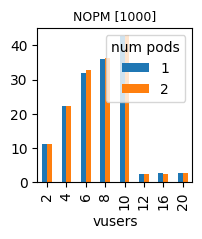

In [16]:
df_pivot = df_plot_this.pivot(columns="pod_count", index=x, values=y)
ax = df_pivot.plot.bar(title="NOPM [1000]", figsize=(2,2))
ax.title.set_size(9)
ax.set_xlabel("vusers")
plt.legend(title='num pods')
df_pivot

## Show Infos about Connections

In [17]:
import ast

with open(path+code+"/connections.config",'r') as inf:
    connections = ast.literal_eval(inf.read())

print("found", len(connections), "connections")

found 16 connections


In [18]:
import json
pretty_connections = json.dumps(connections, indent=2)

#print(pretty_connections)

### Loading time per number of loading threads

PostgreSQL-AWS-8-1-1 858.2793293800205 [s] for 8 threads on ip-192-168-88-174.eu-central-1.compute.internal
PostgreSQL-AWS-8-1-2 858.2793293800205 [s] for 8 threads on ip-192-168-88-174.eu-central-1.compute.internal
PostgreSQL-AWS-8-1-3 858.2793293800205 [s] for 8 threads on ip-192-168-88-174.eu-central-1.compute.internal
PostgreSQL-AWS-8-1-4 858.2793293800205 [s] for 8 threads on ip-192-168-88-174.eu-central-1.compute.internal
PostgreSQL-AWS-8-1-5 858.2793293800205 [s] for 8 threads on ip-192-168-88-174.eu-central-1.compute.internal
PostgreSQL-AWS-8-1-6 858.2793293800205 [s] for 8 threads on ip-192-168-88-174.eu-central-1.compute.internal
PostgreSQL-AWS-8-1-7 858.2793293800205 [s] for 8 threads on ip-192-168-88-174.eu-central-1.compute.internal
PostgreSQL-AWS-8-1-8 858.2793293800205 [s] for 8 threads on ip-192-168-88-174.eu-central-1.compute.internal
PostgreSQL-AWS-8-2-1 853.4259790199576 [s] for 8 threads on ip-192-168-88-174.eu-central-1.compute.internal
PostgreSQL-AWS-8-2-2 853.425

<AxesSubplot: title={'center': 'Loading time [s]'}>

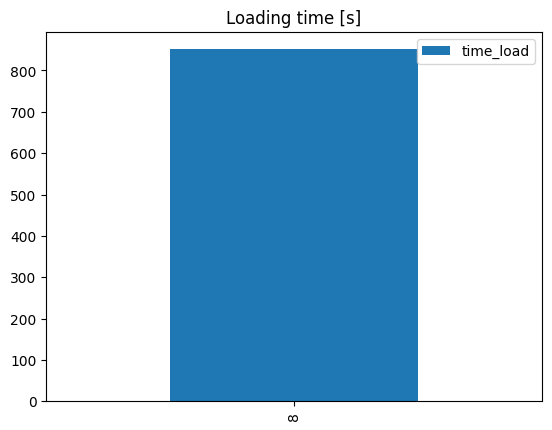

In [19]:
connections_sorted = sorted(connections, key=lambda c: c['name']) 

result = dict()

for c in connections_sorted:
    print(c['name'], 
          c['timeLoad'], 
          '[s] for', 
          c['parameter']['connection_parameter']['loading_parameters']['PARALLEL'], 
          'threads on',
          c['hostsystem']['node'])
    result[c['parameter']['connection_parameter']['loading_parameters']['PARALLEL']] = c['timeIngesting']

print(result)

df = pd.DataFrame(result, index=['time_load'])#, index=result.keys())

df.T.sort_index().plot.bar(title="Loading time [s]")
#df[1]

<AxesSubplot: title={'center': 'Imported warehouses [1/h]'}>

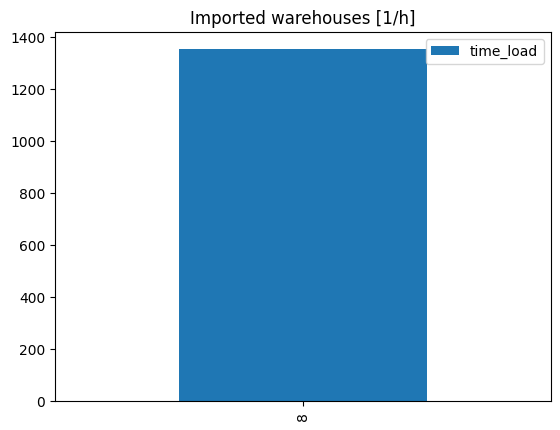

In [20]:
df_tpx = (warehouses*3600.0)/df.T.sort_index()

df_tpx.plot.bar(title="Imported warehouses [1/h]")

## Get monitoring metrics

### Loading

In [21]:
evaluation.transform_monitoring_results()

#### Example metric

In [22]:
evaluation.get_monitoring_metrics()

df = evaluation.get_monitoring_metric('total_cpu_memory')

df.T

0            1            2            3    \
PostgreSQL-AWS-8-1-1  2376.519531  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-2  2376.519531  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-3  2376.519531  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-4  2376.519531  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-5  2376.519531  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-6  2376.519531  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-8  2376.519531  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-2-1  2379.601562  2379.601562  2379.601562  2382.261719   
PostgreSQL-AWS-8-2-2  2379.601562  2379.601562  2379.601562  2382.261719   
PostgreSQL-AWS-8-2-3  2379.601562  2379.601562  2379.601562  2382.261719   
PostgreSQL-AWS-8-2-4  2379.601562  2379.601562  2379.601562  2382.261719   
PostgreSQL-AWS-8-2-5  2379.601562  2379.601562  2379.601562  2382.261719   
PostgreSQL-AWS-8-2-6  2379.601562  2379.601562  2379.601562  2382.261719   
PostgreSQL-AWS-8-2-7  2379.601562  2379.601562  2379.601562  2382.261719   
PostgreSQL-AWS-8-2-8  2379.601562  2379.601562  2379.601562  2382.261719   

                              4            5            6            7    \
PostgreSQL-AWS-8-1-1  2377.574219  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-2  2377.574219  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-3  2377.574219  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-4  2377.574219  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-5  2377.574219  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-6  2377.574219  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-1-8  2377.574219  2377.574219  2377.574219  2377.574219   
PostgreSQL-AWS-8-2-1  2382.261719  2382.261719  2382.261719  2382.261719   
PostgreSQL-AWS-8-2-2  2382.261719  2382.261719  2382.261719  2382.261719   
PostgreSQL-AWS-8-2-3  2382.261719  2382.261719  2382.261719  2382.261719   
PostgreSQL-AWS-8-2-4  2382.261719  2382.261719  2382.261719  2382.261719   
PostgreSQL-AWS-8-2-5  2382.261719  2382.261719  2382.261719  2382.261719   
PostgreSQL-AWS-8-2-6  2382.261719  2382.261719  2382.261719  2382.261719   
PostgreSQL-AWS-8-2-7  2382.261719  2382.261719  2382.261719  2382.261719   
PostgreSQL-AWS-8-2-8  2382.261719  2382.261719  2382.261719  2382.261719   

                              8            9    ...           910  \
PostgreSQL-AWS-8-1-1  2377.574219  2377.574219  ...  27712.347656   
PostgreSQL-AWS-8-1-2  2377.574219  2377.574219  ...  27712.347656   
PostgreSQL-AWS-8-1-3  2377.574219  2377.574219  ...  27712.347656   
PostgreSQL-AWS-8-1-4  2377.574219  2377.574219  ...  27712.347656   
PostgreSQL-AWS-8-1-5  2377.574219  2377.574219  ...  27712.347656   
PostgreSQL-AWS-8-1-6  2377.574219  2377.574219  ...  27712.347656   
PostgreSQL-AWS-8-1-8  2377.574219  2377.574219  ...  27712.347656   
PostgreSQL-AWS-8-2-1  2382.261719  2382.261719  ...           NaN   
PostgreSQL-AWS-8-2-2  2382.261719  2382.261719  ...           NaN   
PostgreSQL-AWS-8-2-3  2382.261719  2382.261719  ...           NaN   
PostgreSQL-AWS-8-2-4  2382.261719  2382.261719  ...           NaN   
PostgreSQL-AWS-8-2-5  2382.261719  2382.261719  ...           NaN   
PostgreSQL-AWS-8-2-6  2382.261719  2382.261719  ...           NaN   
PostgreSQL-AWS-8-2-7  2382.261719  2382.261719  ...           NaN   
PostgreSQL-AWS-8-2-8  2382.261719  2382.261719  ...           NaN   

                               911           912           913           914  \
PostgreSQL-AWS-8-1-1  27712.347656  27712.347656  27712.347656  27712.347656   
PostgreSQL-AWS-8-1-2  27712.347656  27712.347656  27712.347656  27712.347656   
PostgreSQL-AWS-8-1-3  27712.347656  27712.347656  27712.347656  27712.347656   
PostgreSQL-AWS-8-1-4  27712.347656  27712.347656  27712.347656  27712.347656   
PostgreSQL-AWS-8-1-5  27712.347656  27712.347656  27712.347656  27712.347656   
PostgreSQL-

#### Plot all metrics

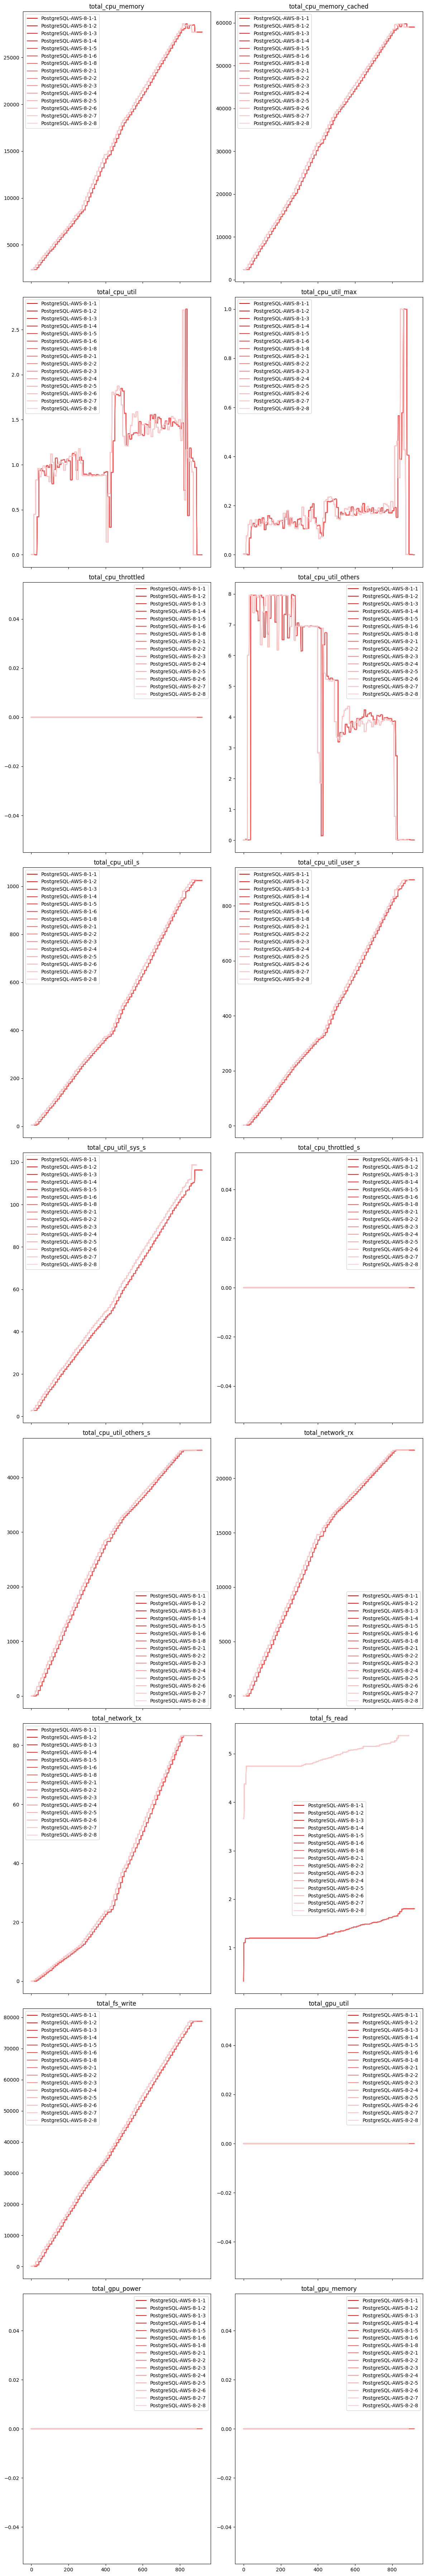

In [23]:
dict_colors = evaluation.get_dict_color_by_connection_property('docker')

evaluation.plot_all_metrics(component='loading', dict_colors=dict_colors)

### Benchmarking

In [24]:
evaluation.transform_monitoring_results(component='stream')

#### Plot all metrics

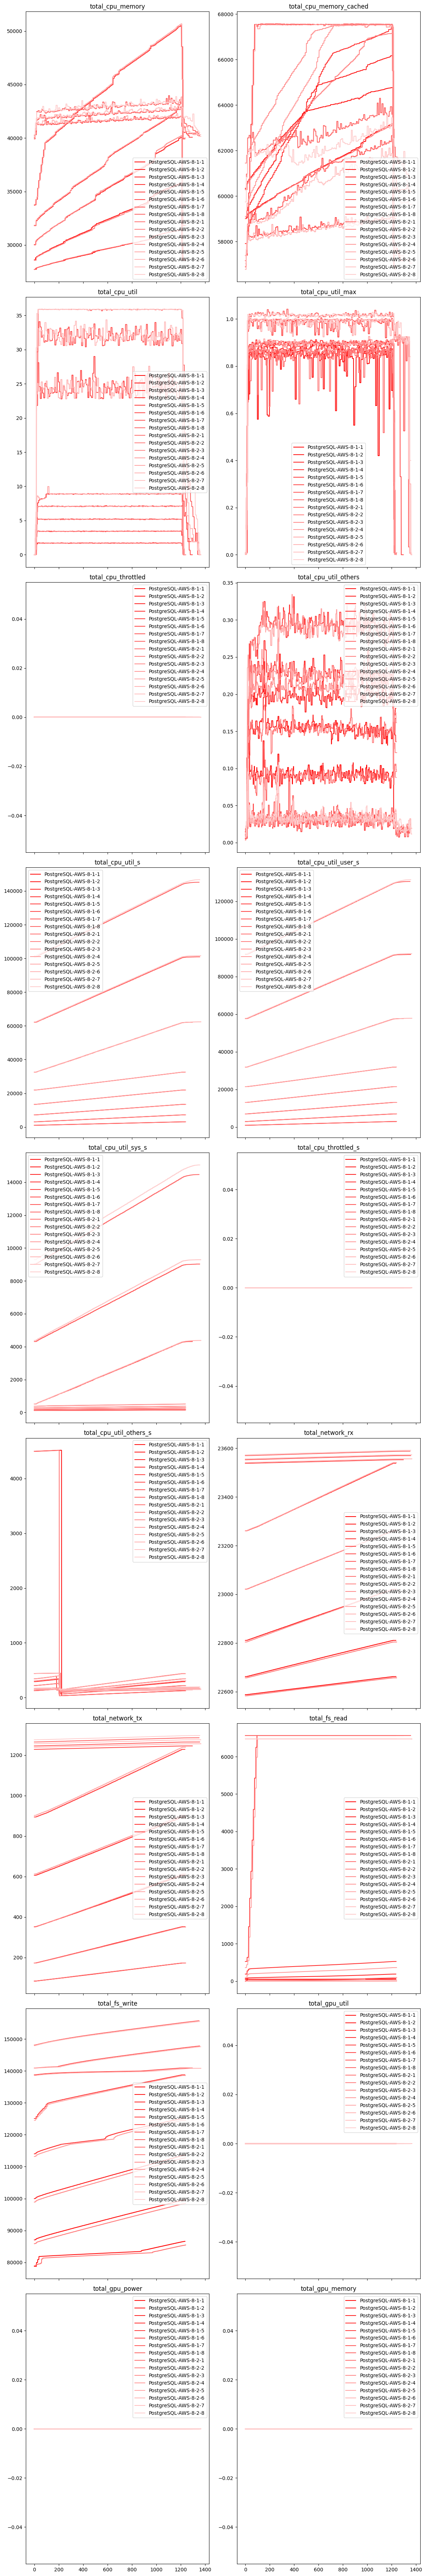

In [25]:
dict_colors = evaluation.get_dict_color_by_connection_property('docker')

evaluation.plot_all_metrics(component='stream', dict_colors=dict_colors)

## Loader Component

In [26]:
evaluation.transform_monitoring_results(component='loader')

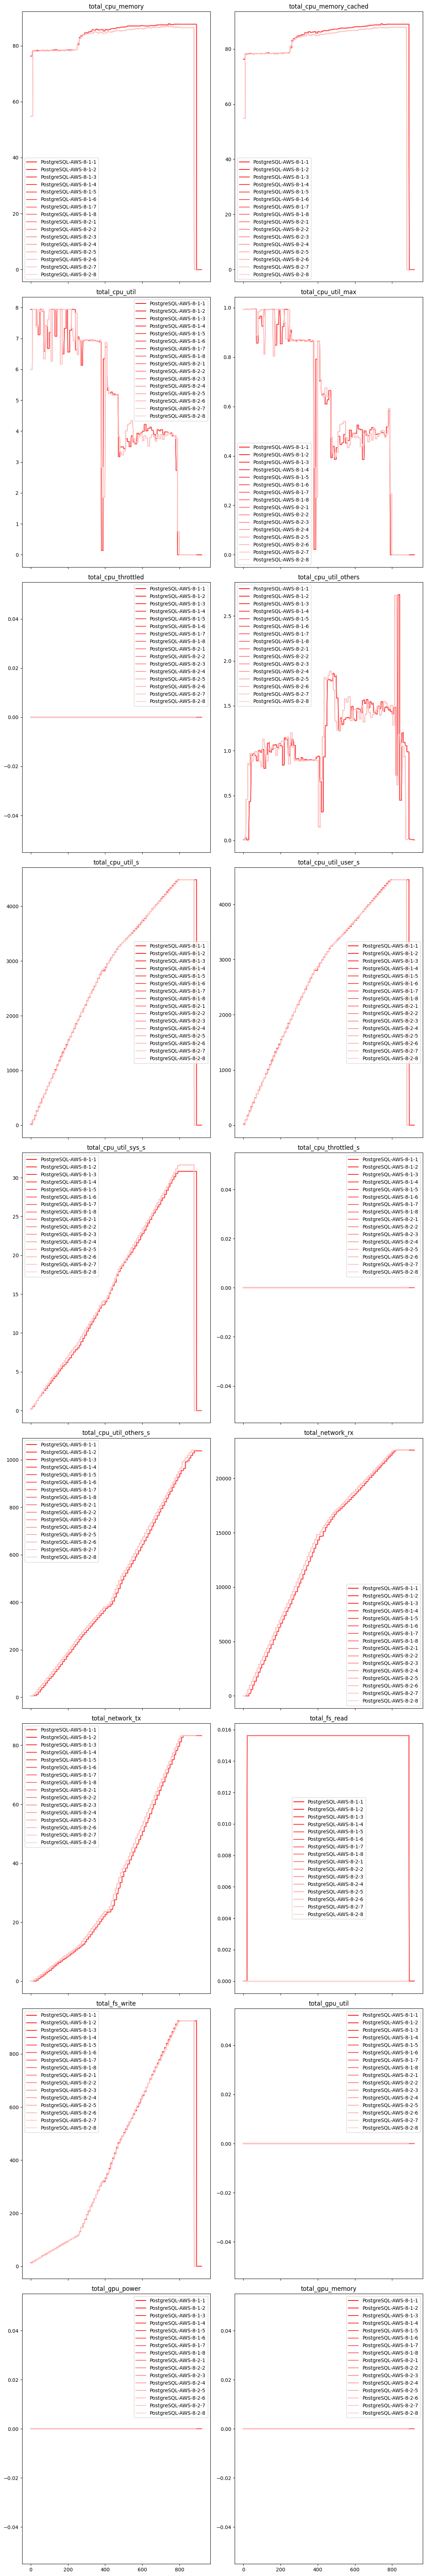

In [27]:
dict_colors = evaluation.get_dict_color_by_connection_property('docker')

evaluation.plot_all_metrics(component='loader', dict_colors=dict_colors)

## Benchmarker Component

In [28]:
evaluation.transform_monitoring_results(component='benchmarker')

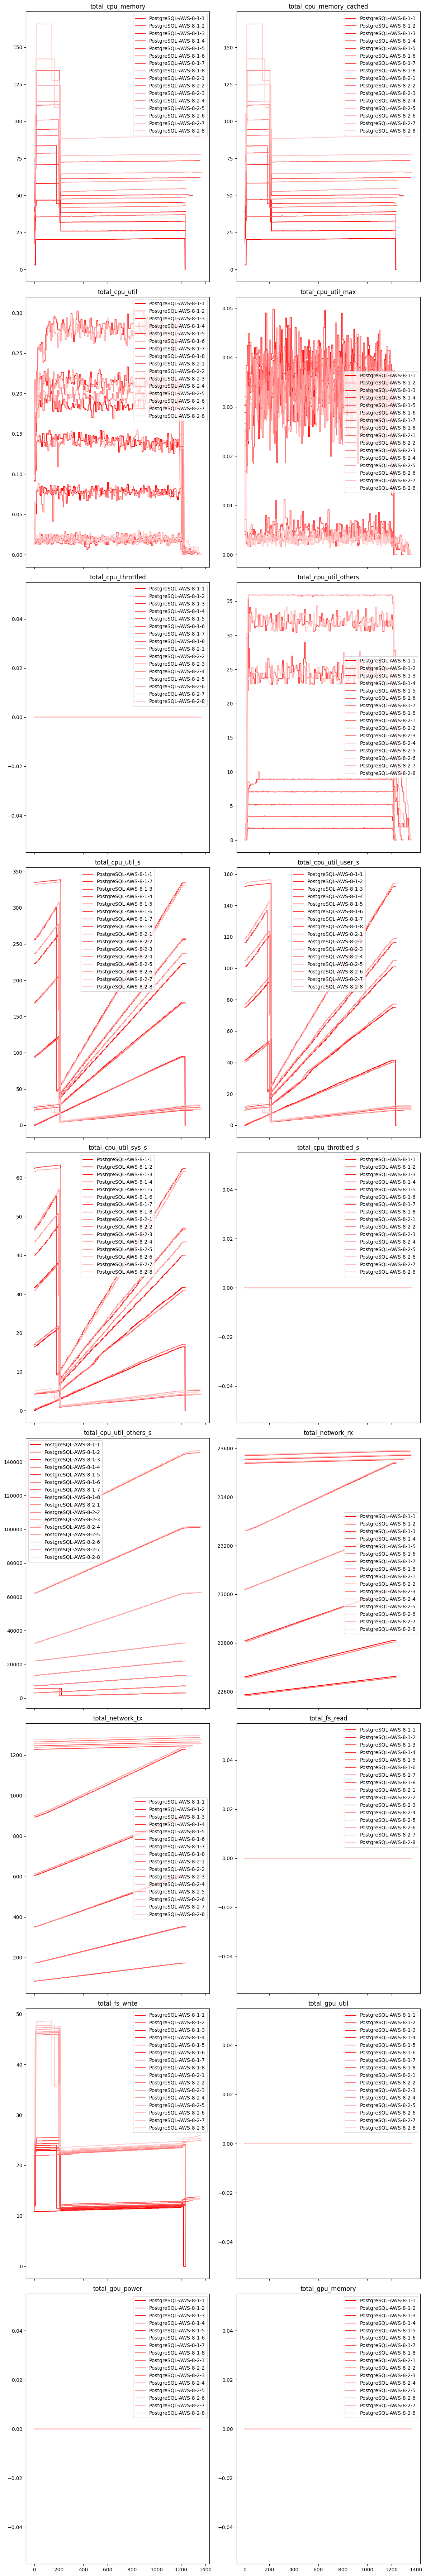

In [29]:
dict_colors = evaluation.get_dict_color_by_connection_property('docker')

evaluation.plot_all_metrics(component='benchmarker', dict_colors=dict_colors)

## Plot Maximums

### Loading Driver

pod_count            1            2
vusers                             
2          4481.923659  4483.512261
4          4481.923659  4483.512261
6          4481.923659  4483.512261
8          4481.923659  4483.512261
10         4481.923659  4483.512261
12         4481.923659  4483.512261
16         4481.923659  4483.512261
20         4481.923659  4483.512261

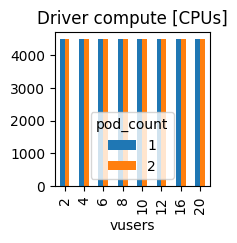

In [30]:
df = evaluation.get_monitoring_metric('total_cpu_util_s', component='loader').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='loader').min()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
#df = df*100

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("Driver compute [CPUs]")
ax.set_xlabel("vusers")
df

pod_count          1          2
vusers                         
2          99.436237  99.430038
4          99.436237  99.430038
6          99.436237  99.430038
8          99.436237  99.430038
10         99.436237  99.430038
12         99.436237  99.430038
16         99.436237  99.430038
20         99.436237  99.430038

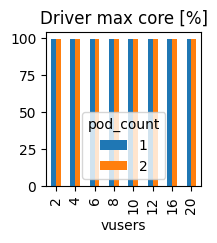

In [31]:
df = evaluation.get_monitoring_metric('total_cpu_util_max', component='loader').max()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
df = df*100

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("Driver max core [%]")
ax.set_xlabel("vusers")
df

### Loading SUT

pod_count            1            2
vusers                             
2          1019.789491  1022.932729
4          1019.789491  1022.932729
6          1019.789491  1022.932729
8          1019.789491  1022.932729
10         1019.789491  1022.932729
12         1019.789491  1022.932729
16                 NaN  1022.932729
20         1019.789491  1022.932729

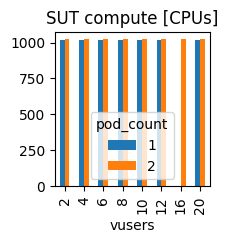

In [32]:
df = evaluation.get_monitoring_metric('total_cpu_util_s', component='loading').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='loading').min()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
#df = df*100

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("SUT compute [CPUs]")
ax.set_xlabel("vusers")
df

### Benchmarking Driver

pod_count           1           2
vusers                           
2           21.019531   37.128906
4           47.167969   78.996094
6           58.687500   91.109375
8           71.039062  101.335938
10          83.558594  113.769531
12          94.835938  124.734375
16         111.312500  142.363281
20         134.703125  165.937500

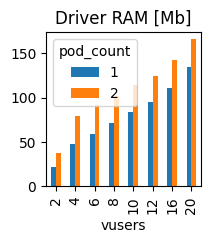

In [33]:
df = evaluation.get_monitoring_metric('total_cpu_memory_cached', component='benchmarker').max()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
df
#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("Driver RAM [Mb]")
ax.set_xlabel("vusers")
df

pod_count         1         2
vusers                       
2          4.576905  4.491198
4          4.154680  4.455223
6          4.584484  4.705691
8          4.981818  4.529897
10         4.655826  4.559959
12         0.858643  2.573528
16         0.874682  1.233893
20         1.122294  0.586441

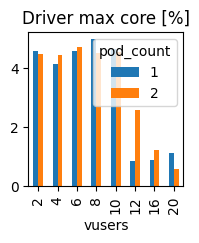

In [34]:
df = evaluation.get_monitoring_metric('total_cpu_util_max', component='benchmarker').max()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
df = df*100

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("Driver max core [%]")
ax.set_xlabel("vusers")
df

pod_count         1         2
vusers                       
2          0.089832  0.088195
4          0.154321  0.156105
6          0.202786  0.211910
8          0.232984  0.230692
10         0.302457  0.304732
12         0.041437  0.058484
16         0.058239  0.064607
20         0.050211  0.065446

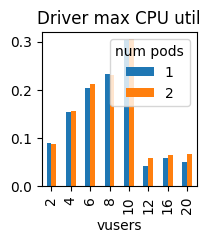

In [35]:
df = evaluation.get_monitoring_metric('total_cpu_util', component='benchmarker').max()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
df

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("Driver max CPU util")
ax.set_xlabel("vusers")
plt.legend(title='num pods')
df

pod_count         1         2
vusers                       
2          4.576905  4.491198
4          4.154680  4.455223
6          4.584484  4.705691
8          4.981818  4.529897
10         4.655826  4.559959
12         0.858643  2.573528
16         0.874682  1.233893
20         1.122294  0.586441

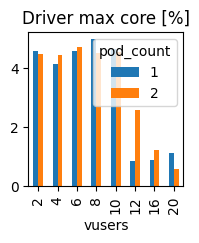

In [36]:
df = evaluation.get_monitoring_metric('total_cpu_util_max', component='benchmarker').max()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
df = df*100

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("Driver max core [%]")
ax.set_xlabel("vusers")
df

pod_count           1           2
vusers                           
2           95.314142   93.896508
4          139.474302  140.958637
6          186.747993  196.917903
8          221.246486  232.527167
10         287.416443  278.265800
12         334.487651  331.262530
16          20.585308   20.871359
20          24.104070   23.969644

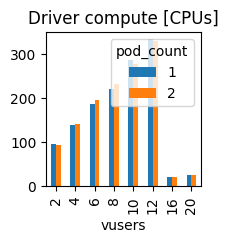

In [37]:
df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
#df = df*100

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("Driver compute [CPUs]")
ax.set_xlabel("vusers")
df

### Benchmarking SUT

pod_count          1          2
vusers                         
2          61.693287  61.626495
4          63.252792  65.588245
6          64.620300  65.946316
8          65.849583  65.953045
10         65.986530  65.957333
12         57.723736  57.809387
16         61.188366  60.657089
20         62.793385  62.063499

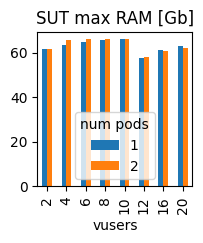

In [38]:
df = evaluation.get_monitoring_metric('total_cpu_memory_cached', component='stream').max()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
df=df/1024

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("SUT max RAM [Gb]")
ax.set_xlabel("vusers")
plt.legend(title='num pods')
df

pod_count             1             2
vusers                               
2           2043.270632   2051.604053
4           4120.177328   4127.644144
6           6243.498871   6218.714911
8           8509.199901   8499.488848
10         10585.587970  10655.767616
12         29618.707144  29796.940616
16         38799.546216  39228.200061
20         44242.976033  45103.393548

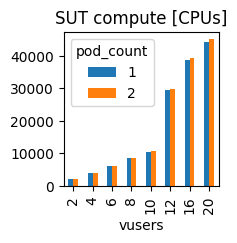

In [39]:
df = evaluation.get_monitoring_metric('total_cpu_util_s', component='stream').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='stream').min()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
#df = df*100

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("SUT compute [CPUs]")
ax.set_xlabel("vusers")
df

pod_count          1          2
vusers                         
2           1.750587   1.787282
4           3.486000   3.483284
6           5.252083   5.253576
8           7.173950   7.158673
10          8.946293   9.977659
12         28.995068  27.569402
16         34.088168  34.352282
20         35.906904  35.912485

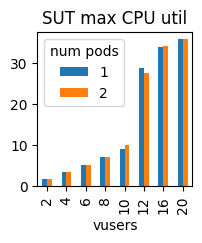

In [40]:
df = evaluation.get_monitoring_metric('total_cpu_util', component='stream').max()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
df

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("SUT max CPU util")
ax.set_xlabel("vusers")
plt.legend(title='num pods')
df

pod_count          1          2
vusers                         
2          30.684032  30.664951
4          34.950676  34.866249
6          39.125412  39.269836
8          42.744438  42.811287
10         49.316925  49.484646
12         41.051659  41.297630
16         41.904602  42.106216
20         42.934875  42.849201

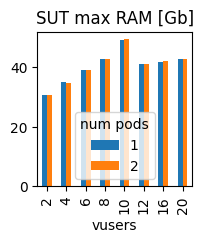

In [41]:
df = evaluation.get_monitoring_metric('total_cpu_memory', component='stream').max()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
df=df/1024

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("SUT max RAM [Gb]")
ax.set_xlabel("vusers")
plt.legend(title='num pods')
df

pod_count           1           2
vusers                           
2           88.045918   87.773511
4           88.224821   88.538473
6           90.924968   88.506432
8           91.211815   91.453907
10          91.242020   92.594286
12          99.873464   99.844669
16         100.526902  101.293747
20         104.180977  103.351100

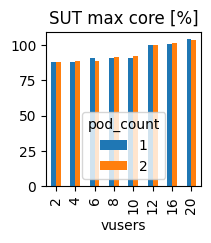

In [42]:
df = evaluation.get_monitoring_metric('total_cpu_util_max', component='stream').max()
df.T
#df.plot.bar()
#df = evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').max() - evaluation.get_monitoring_metric('total_cpu_util_s', component='benchmarker').min()
#df = df.filter(regex='12288', axis=0)
#df['connection'] = df.index
df = pd.DataFrame(df)
df['index'] = list(df.index)
df['vusers'] = df.index.map(lambda x: str(df_aggregated.loc[x]['vusers']))
df['pod_count'] = df.index.map(lambda x: str(df_aggregated.loc[x]['pod_count']))
df = df.pivot(columns='pod_count', values=0, index='vusers')
df.index = df.index.map(lambda x: int(x))
df.sort_values("vusers", inplace=True)
df = df*100

#df['index'].map(lambda x: str(df_aggregated.loc[x]['terminals']))
#df.index = df.index.map(lambda x: str(df_aggregated.loc[x]['terminals']))
#             str(df_aggregated.loc[x]['terminals'])+"-"+str(df_aggregated.loc[x]['target'])+"-"+str(df_aggregated.loc[x]['pod_count'])'')
#df.sort_index(inplace=True)
ax = df.plot.bar(figsize=(2,2),legend=True)
#plt.legend(loc='best')
ax.title.set_size(9)
ax.set_title("SUT max core [%]")
ax.set_xlabel("vusers")
df